In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/transaction-data/Txn_data.csv


Outliers

In [2]:
import matplotlib.pyplot as plt

In [3]:
# df = pd.read_csv('/kaggle/input/transaction-data/Txn_data.csv',)
df = pd.read_csv('/kaggle/input/transaction-data/Txn_data.csv', 
                 dtype={'From_Account_id': str, 'To_Account_id': str, 'amount': float})


In [4]:
# Check the structure
df.info()

# Peek at the data
df.head()

# Summary statistics for 'amount'
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')  # ensure it's numeric
# df['amount'].describe()

df['Date/Time'] = pd.to_datetime(df['Date/Time'], errors='coerce')





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63690622 entries, 0 to 63690621
Data columns (total 5 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0       int64  
 1   Date/Time        object 
 2   From_Account_id  object 
 3   To_Account_id    object 
 4   amount           float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.4+ GB


In [5]:
# pd.set_option('display.float_format', '{:,.2f}'.format)
# df['amount'].describe()

In [6]:
# q95 = df['amount'].quantile(0.95)
# plt.figure(figsize=(8,5))
# plt.boxplot(df.loc[df['amount']<=q95,'amount'],vert=False)
# plt.title("Box plot of amount (cappted at 95th percentile")
# plt.show()

In [7]:
# import seaborn as sns
# plt.figure(figsize = (10,5))
# sns.histplot(df.loc[df['amount']<=q95,'amount'],bins=100, kde=True)
# plt.title("Distribution of Transaction amounts")
# plt.xlabel("Amount")
# plt.ylabel("Frequency")
# plt.grid(True)
# plt.show()

In [8]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np

# # Filtered amounts capped at 95th percentile
# amounts = df.loc[df['amount'] <= q95, 'amount']

# # Create histogram data with numpy to get counts
# counts, bin_edges = np.histogram(amounts, bins=100)

# print(f"Minimum frequency in bins: {counts.min()}")
# print(f"Maximum frequency in bins: {counts.max()}")


In [9]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import matplotlib.ticker as ticker

# plt.figure(figsize=(12, 6))
# ax = sns.histplot(df.loc[df['amount'] <= q95, 'amount'], bins=100, kde=True)

# # Title and labels
# plt.title("Distribution of Transaction Amounts (Capped at 95th Percentile)")
# plt.xlabel("Amount")
# plt.ylabel("Frequency")

# # Force integer y-axis with full range
# ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=10))  # up to 10 ticks

# # Optional: Format large numbers with commas
# ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# plt.grid(True)
# plt.show()


In [10]:
# df['DayOfWeek'] = df['Date/Time'].dt.day_name()
# df['Hour'] = df['Date/Time'].dt.hour
# df['Month']= df['Date/Time'].dt.month_name()
# df['Date'] = df['Date/Time'].dt.date

# print(df['DayOfWeek'])

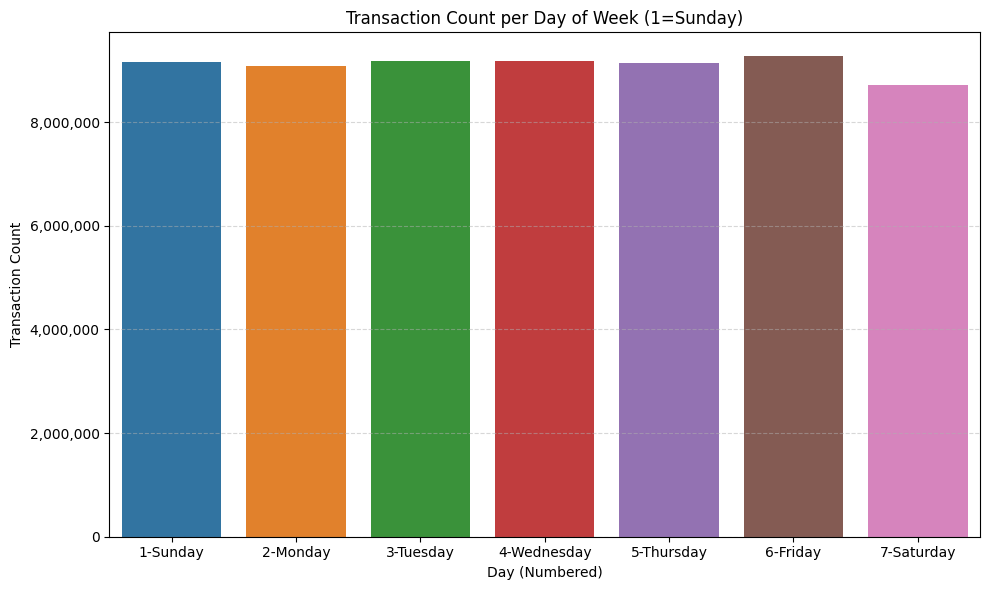

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Ensure datetime and day column exist
df['Date/Time'] = pd.to_datetime(df['Date/Time'], errors='coerce')
df['DayNum'] = df['Date/Time'].dt.dayofweek  # Monday=0, Sunday=6
df['DayLabel'] = df['Date/Time'].dt.day_name()

# Map to custom order: Sunday=1, Monday=2, ..., Saturday=7
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
day_labels_with_numbers = [f"{i+1}-{day}" for i, day in enumerate(day_order)]
df['DayLabelNum'] = df['DayLabel'].map(lambda x: f"{day_order.index(x)+1}-{x}")

# Plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='DayLabelNum', order=day_labels_with_numbers)

# Format Y-axis ticks with real numbers
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Title and labels
plt.title("Transaction Count per Day of Week (1=Sunday)")
plt.xlabel("Day (Numbered)")
plt.ylabel("Transaction Count")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


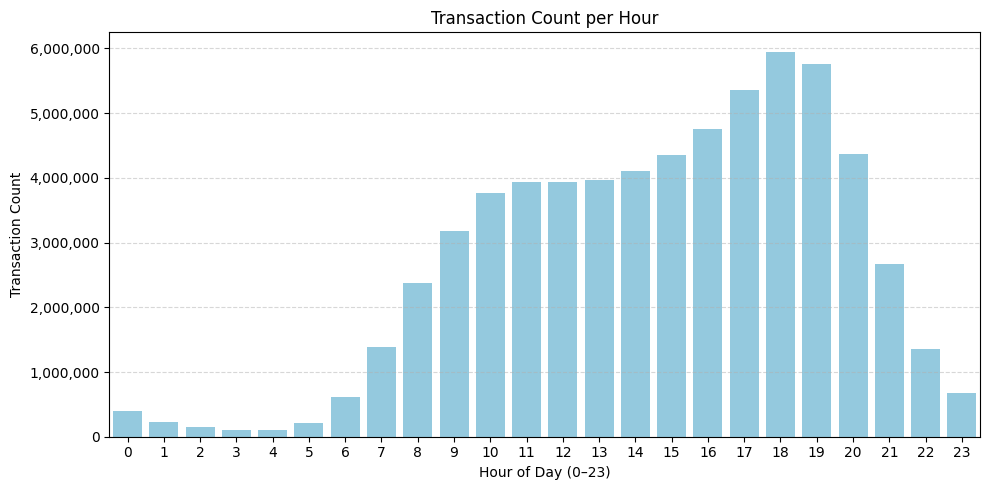

In [12]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import seaborn as sns

df['Date/Time'] = pd.to_datetime(df['Date/Time'], errors='coerce')
df['Hour'] = df['Date/Time'].dt.hour


plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='Hour', color='skyblue')

ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title("Transaction Count per Hour")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Transaction Count")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


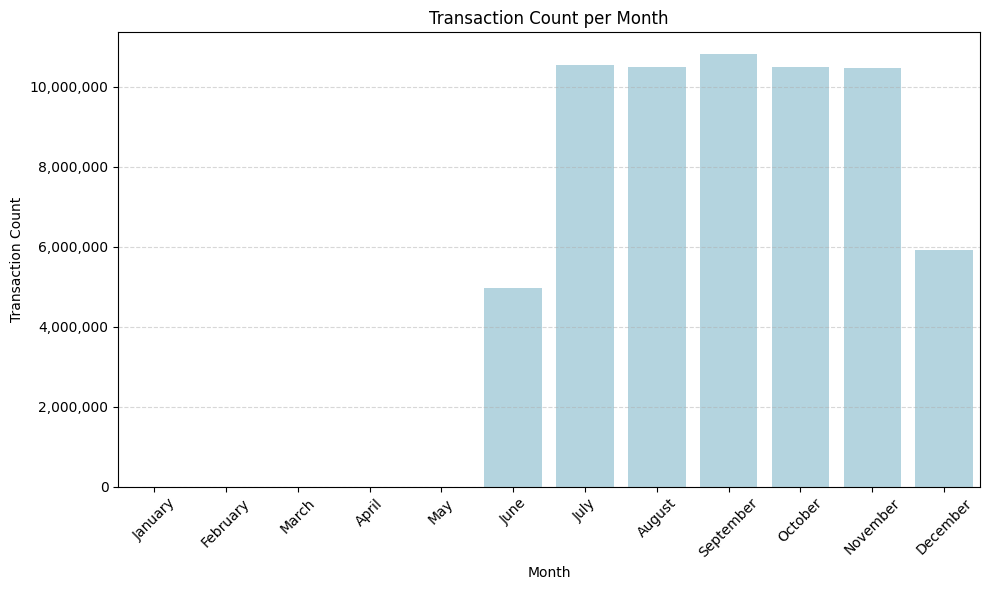

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

df['Date/Time'] = pd.to_datetime(df['Date/Time'], errors='coerce')
df['Month'] = df['Date/Time'].dt.month_name()

plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=df,
    x='Month',
    order=['January', 'February', 'March', 'April', 'May', 'June',
           'July', 'August', 'September', 'October', 'November', 'December'],
    color='lightblue'
)

ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title("Transaction Count per Month")
plt.xlabel("Month")
plt.ylabel("Transaction Count")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [14]:
# df.groupby('DayOfWeek')['amount'].mean().loc[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
# .plot(kind='bar', figsize=(10,5), title='Average Transation Amount per day', ylabel="Average Amount")
# plt.grid(True)
# plt.show()

In [15]:
# df.groupby('Hour')['amount'].mean().plot(kind='bar',figsize=(10,5), title="Average Transaction Amount per Hour", ylabel="Average amount")
# plt.grid(True)
# plt.show()

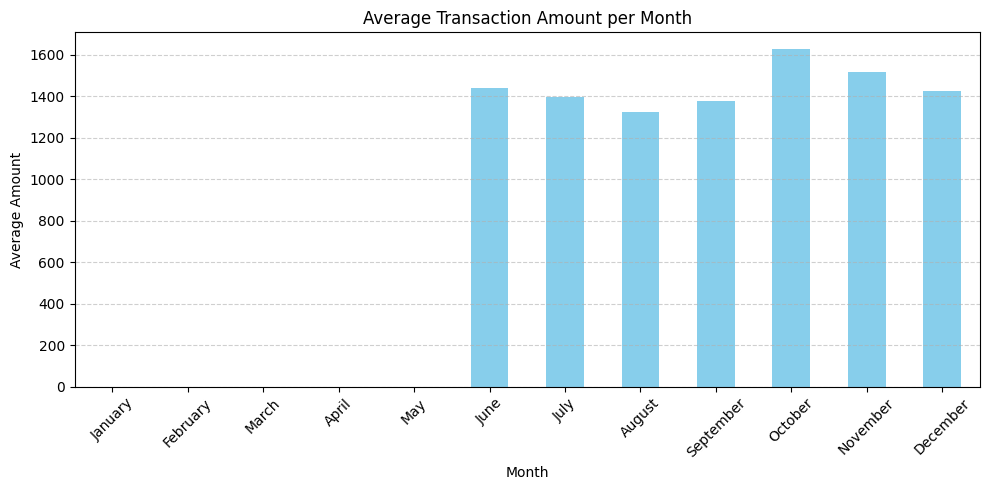

In [16]:
import matplotlib.pyplot as plt

df['Date/Time'] = pd.to_datetime(df['Date/Time'], errors='coerce')
df['Month'] = df['Date/Time'].dt.month_name()

month_order = ['January','February','March','April','May','June',
               'July','August','September','October','November','December']

monthly_avg = df.groupby('Month')['amount'].mean().reindex(month_order)

# Plot
monthly_avg.plot(kind='bar', figsize=(10, 5), title="Average Transaction Amount per Month", ylabel="Average Amount", color='skyblue')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [17]:
min_date = df['Date/Time'].min()
max_date = df['Date/Time'].max()
print(f"Data ranges from {min_date.date()} to {max_date.date()}")

Data ranges from 2024-06-15 to 2025-11-19


In [18]:
# Unique months present
present_months = df['Month'].unique()

all_months = ['January','February','March','April','May','June','July',
              'August','September','October','November','December']

missing_months = set(all_months) - set(present_months)

print("Missing Months:", missing_months)


Missing Months: {'May', 'April', 'March', 'January', 'February'}


In [19]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], errors='coerce')

df['Year'] = df['Date/Time'].dt.year
df['Month'] = df['Date/Time'].dt.month_name()

present_months_by_year = df.groupby('Year')['Month'].unique().apply(set)

all_months = {'January','February','March','April','May','June',
              'July','August','September','October','November','December'}
month_order = ['January','February','March','April','May','June',
               'July','August','September','October','November','December']

for year, months_present in present_months_by_year.items():
    sorted_months = sorted(months_present, key=lambda m: month_order.index(m))
    print(f"\n📅 Months of {year} in dataset: {', '.join(sorted_months)}")
    
    missing = all_months - months_present
    if missing:
        print(f"❌ Missing months in {year}: {', '.join(sorted(missing, key=lambda m: month_order.index(m)))}")
    else:
        print("✅ All 12 months are present in this year.")



📅 Months of 2024 in dataset: June, July, August, September, October, November, December
❌ Missing months in 2024: January, February, March, April, May

📅 Months of 2025 in dataset: November
❌ Missing months in 2025: January, February, March, April, May, June, July, August, September, October, December
